<a href="https://colab.research.google.com/github/TuNguyen142/AL-13-2/blob/main/Heobibenh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten,  LeakyReLU
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
%cd /content/drive/MyDrive/Al/Al


/content/drive/MyDrive/Al/Al


In [4]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [9]:
# Tạo bộ dữ liệu training set
training_set=train.flow_from_directory('/content/drive/MyDrive/Al/Al/Train',
                                               target_size=(30,40), batch_size=32, class_mode='categorical')

Found 40 images belonging to 2 classes.


In [10]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'Bệnh': 0, 'Không bệnh': 1}

In [12]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()

model.add(Conv2D(32,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same',input_shape=(30,40,3))) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))


model.add(Conv2D(64,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Flatten())
model.add(Dense(256,activation='linear',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(2,activation='softmax'))

# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 40, 32)        896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 30, 40, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 15, 20, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 15, 20, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 10, 64)        0         
 2D)                                                  

In [14]:
a = model.fit_generator( training_set, epochs=80, steps_per_epoch=len(training_set)
)

<ipython-input-14-d08e984be685>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  a = model.fit_generator( training_set, epochs=80, steps_per_epoch=len(training_set)


Epoch 1/80
2/2 [==============================] - 5s 120ms/step - loss: 5.3154 - accuracy: 0.5000
Epoch 2/80
2/2 [==============================] - 0s 163ms/step - loss: 1.7272 - accuracy: 0.5000
Epoch 3/80
2/2 [==============================] - 0s 36ms/step - loss: 0.8426 - accuracy: 0.5250
Epoch 4/80
2/2 [==============================] - 0s 33ms/step - loss: 0.9097 - accuracy: 0.5000
Epoch 5/80
2/2 [==============================] - 0s 37ms/step - loss: 0.6908 - accuracy: 0.6000
Epoch 6/80
2/2 [==============================] - 0s 32ms/step - loss: 0.7321 - accuracy: 0.5000
Epoch 7/80
2/2 [==============================] - 0s 180ms/step - loss: 0.7018 - accuracy: 0.5250
Epoch 8/80
2/2 [==============================] - 0s 179ms/step - loss: 0.6721 - accuracy: 0.5750
Epoch 9/80
2/2 [==============================] - 0s 35ms/step - loss: 0.6563 - accuracy: 0.5250
Epoch 10/80
2/2 [==============================] - 0s 187ms/step - loss: 0.6662 - accuracy: 0.5250
Epoch 11/80
2/2 [=======

In [15]:
model.save('/content/drive/MyDrive/Al/Al/Train.h5')

In [16]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.029060697183012962
Train Accuracy 1.0


<function matplotlib.pyplot.show(close=None, block=None)>

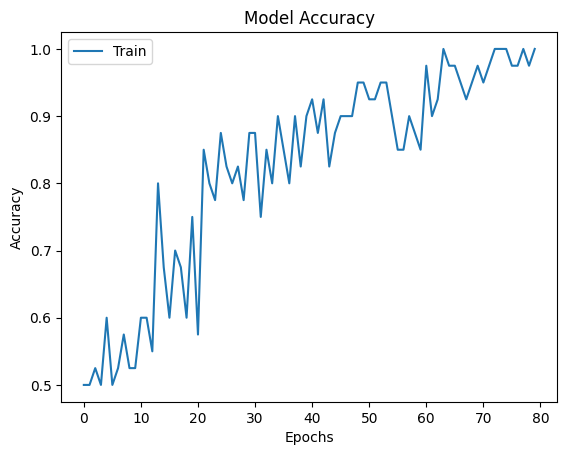

In [17]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(a.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train'])
plt.show

In [18]:
model1= load_model('/content/drive/MyDrive/Al/Al/Train.h5')

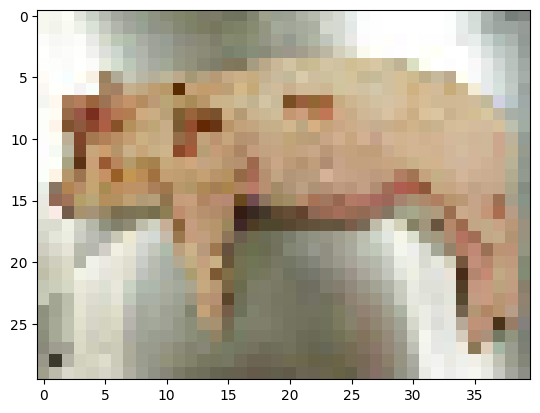

In [19]:
img = load_img('/content/drive/MyDrive/Al/Al/Test/h2.jpg', target_size=(30,40))
plt.imshow(img)

In [20]:
class_name=['Bệnh', 'Không bệnh']

In [21]:
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,30,40,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
class_name[y_classes[0]]

1/1 [==============================] - 0s 444ms/step
[[0.97513074 0.02486926]]


'Bệnh'